# Getting Started with Python and openCV

## Standar Test Images
[Wikipedia entry on standard test images](https://en.wikipedia.org/wiki/Standard_test_image)




## Images used in the exampes


<img src="./images/fubar.jpg" height="10%" width="10%" alt="fubar power racing" />
<!-- ![fubar](./images/fubar.jpg) -->



In [24]:
#print the version of openCV
%matplotlib inline 
import cv2
import numpy as np
from matplotlib import pyplot as plt

print(cv2.__version__)


3.2.0


In [25]:
img = cv2.imread("./images/fubar.jpg")

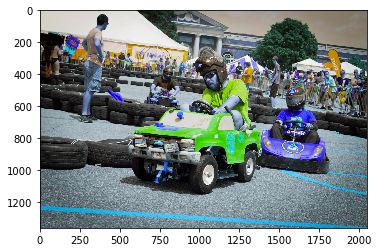

In [26]:
plt.imshow(img)
plt.show()


# Loading with different color modes
bgr vs rgb

Different programs need the color in different  order
opencv uses: BGR

cv.imread() and the colors need to be:
matplotlib expects the colors in this sequence: RGB

This can be converted for display by using a color converter function:
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


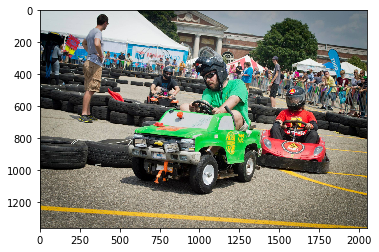

In [27]:
imgColorFix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgColorFix)
plt.show()

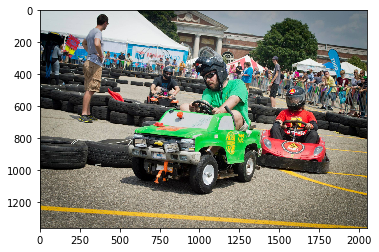

In [28]:
#let's try to clean up the display
plt.imshow(imgColorFix,interpolation="nearest")
plt.show()

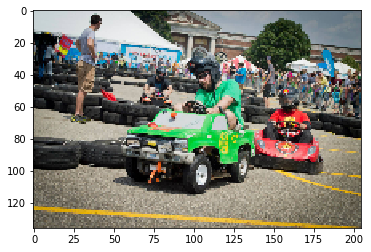

In [29]:
#We can resize the image
imgResized = cv2.resize(imgColorFix, None, fx=1/10, fy=1/10)
plt.imshow(imgResized)
plt.show()

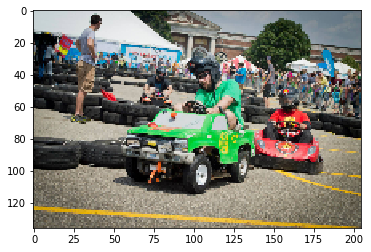

In [30]:
#Let's try to clean up the display
plt.imshow(imgResized, interpolation="nearest")
plt.show()

In [47]:
imgResized.shape




(136, 205, 3)

In [ ]:
imgResized

In [31]:
#Let's try printing the color constants for imread
print(cv2.IMREAD_GRAYSCALE)


0


In [32]:
#It's possible to read in images as different kinds with different color options
imgGray = cv2.imread("./images/fubar.jpg", cv2.IMREAD_GRAYSCALE)

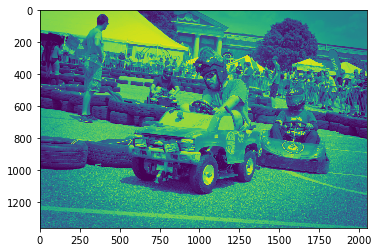

In [33]:
#The trouble here is that we have grayscale on one channel but matplotlib doesn't know what channel to assign it too
plt.imshow(imgGray)
plt.show()




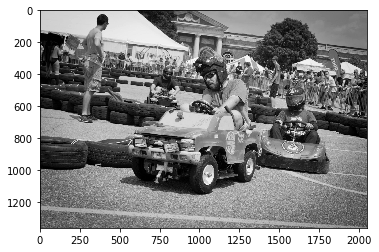

In [34]:
#We can force matplot lib to display grayscale
plt.imshow(imgGray, cmap=plt.cm.gray)
plt.show()

In [45]:
imgGray.shape



(1362, 2048)

#show red channel as red

So the issue is that matplotlib wasn't to display a complete image. We need to know:
* What is a complete image?
* How is it represented?
* How can we get a read channel to show as red?


#What is an image?

64x64 color test image
<img src="./images/colortest.png" alt="color test image" />

In opencv it's an array of colors, and pixels.


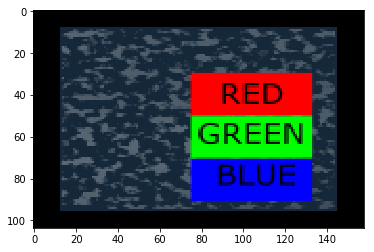

In [35]:
#load the test image and show it
img = cv2.imread("./images/colortest.png")
imgColorFix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgColorFix)
plt.show()

In [36]:
#What is the shape?
img.shape


(104, 158, 3)

In [37]:
#color fixed for matplotlib shape
imgColorFix.shape


(104, 158, 3)

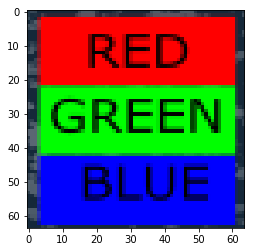

In [38]:
#There the same shape but the color order in the 3rd position is different
#The image is not centered around the color data we can fix that 
img_cropped = imgColorFix[28:92, 72:136]
plt.imshow(img_cropped, interpolation="nearest")
plt.show()


In [39]:
#by changing the shape dimensions the image shape changed
img_cropped.shape

(64, 64, 3)

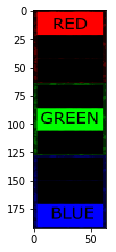

In [40]:
#Seperating the color channels
images = []
for ii in [0,1,2]:
    color = img_cropped.copy()
    #empty the color channels
    if ii != 0: color[:,:,0] = 0
    if ii != 1: color[:,:,1] = 0
    if ii != 2: color[:,:,2] = 0
    images.append(color)   
    
plt.imshow(np.vstack(images), interpolation="nearest")
plt.show()

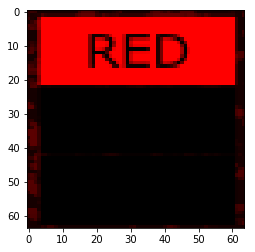

In [41]:
# Now we can just show the red channel
plt.imshow(images[0])
plt.show()



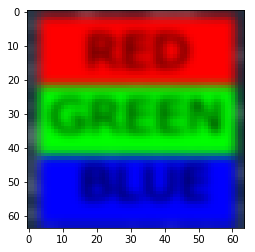

In [42]:
#There are several other manipulations we can too

image_blur = cv2.GaussianBlur(img_cropped, (7,7),0)
plt.imshow(image_blur);
plt.show()


# More Resources

https://alexlouden.com/posts/2016-computer-vision-on-strawberries.html
